# Hi :)

# Import libraries

In [1]:
import numpy as np
from scipy.optimize import root_scalar
import matplotlib.pyplot as plt

# Lambda calculation

Initialization

In [2]:
# Given fuzzy measures
g= [0.6, 0.4, 0.7, 0.3]

# Define the function whose root(s) we want
def f(lmbda):
    product= 1
    for gi in g:
        product *= (1 + lmbda * gi)
    return product - (1 + lmbda)

Finding lambda

In [3]:
# Scan the function over a wide range to identify sign changes
x_vals= np.linspace(-0.99, 5, 10000)
y_vals= [f(x) for x in x_vals]

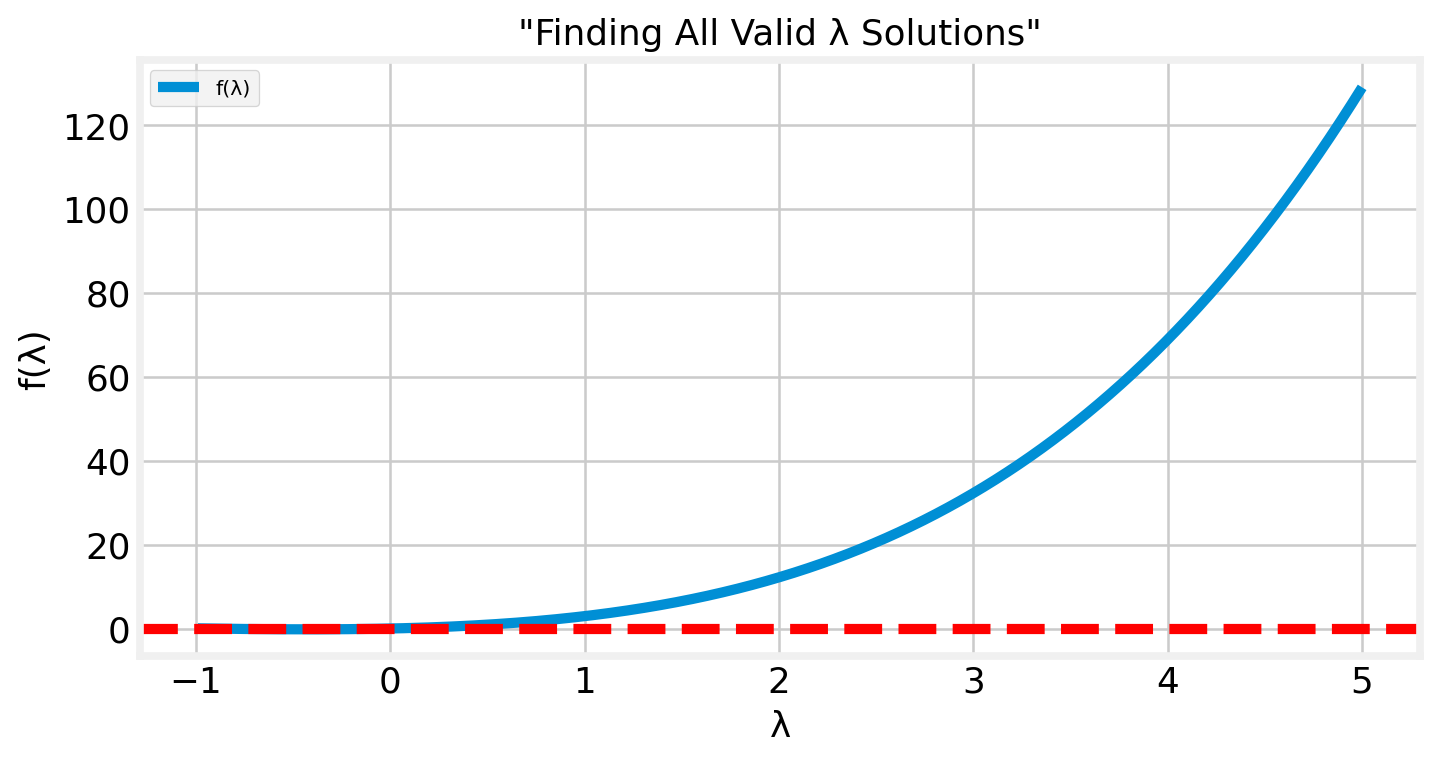

In [4]:
# Plot the function
plt.style.use('fivethirtyeight')
fig, ax= plt.subplots(figsize= (8, 4), dpi= 184)
ax.plot(x_vals, y_vals, label= 'f(λ)')
ax.axhline(0, color= 'red', linestyle= '--')
ax.set_title('"Finding All Valid λ Solutions"', fontsize= 14)
ax.set_xlabel('λ', fontsize= 14)
ax.set_ylabel('f(λ)', fontsize= 14)
ax.grid(True)
ax.set_facecolor('white')
fig.set_facecolor('white')
ax.legend(fontsize= 8);

In [5]:
# Find intervals where the function changes sign (potential roots)
roots= []
for i in range(len(x_vals) - 1):
    if np.sign(y_vals[i]) != np.sign(y_vals[i + 1]):
        try:
            res= root_scalar(f, bracket= [x_vals[i], x_vals[i + 1]], method= 'bisect')
            if res.converged:
                root= round(res.root, 6)
                if root not in roots:
                    roots.append(root)
        except:
            pass

# Display all valid roots found
print("Valid lambda roots found:")
for r in roots:
    print("λ ≈", r)

Valid lambda roots found:
λ ≈ -0.930222
λ ≈ -0.0


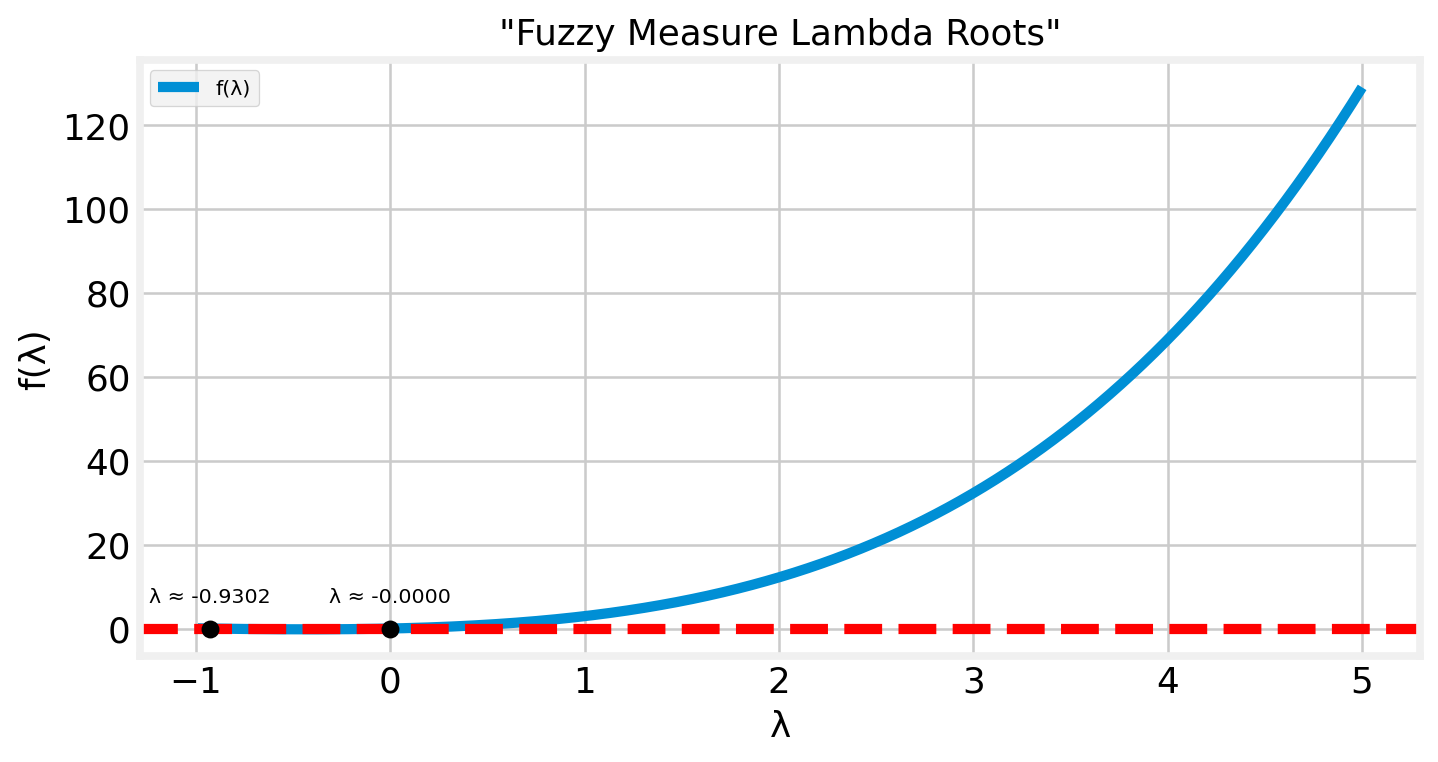

In [6]:
# Plot the function to visualize roots
plt.style.use('fivethirtyeight')
fig, ax= plt.subplots(figsize= (8, 4), dpi= 184)
ax.plot(x_vals, y_vals, label= 'f(λ)')
ax.axhline(0, color= 'red', linestyle= '--')
for r in roots:
    ax.plot(r, f(r), 'ko')
    ax.annotate(f'λ ≈ {r:.4f}', (r, f(r)), textcoords= "offset points", xytext= (0,10), ha= 'center', fontsize= 8)
ax.set_title('"Fuzzy Measure Lambda Roots"', fontsize= 14)
ax.set_xlabel('λ', fontsize= 14)
ax.set_ylabel('f(λ)', fontsize= 14)
ax.grid(True)
ax.set_facecolor('white')
fig.set_facecolor('white')
ax.legend(fontsize= 8);